### K-Means Clustering 1
-----------

This material is based on the previous version of CS108L, see https://cs4all.cs.unm.edu/cs108.html
- Credit to Prof. Melanie Moses, Dr. Irene Lee, Dr. Maureen Psaila-Dombrowski, Prof. Dave Ackley and collaborators (see website)

### Overview of K-Means Clustering

Consider the following
1. Say your are given N data points.  These can be points in the x-y plane
   
2. Next, you group these N data points into K groups (also called clusters)

3. Each data point will belong to one, and only one group (or cluster)

4. Each cluster will have a centroid (or center of gravity)

5. The goal is to make sure that each point is in the group that has the closest centroid (or center of gravity).  

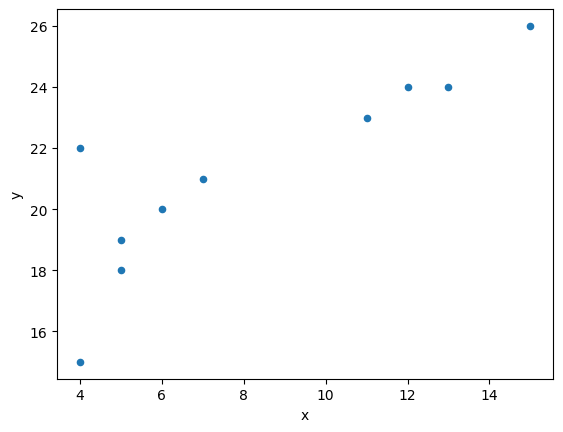

In [1]:
%matplotlib inline
import pandas as pd
x = [4,  6,  7,  5,  4,  12, 15 , 5, 13, 11]
y = [22, 20, 21, 18, 15, 24, 26, 19, 24, 23]

df = pd.DataFrame({'x': x, 'y': y})
ax = df.plot.scatter(x='x', y='y')

### This seems simple enough!

### However, consider this...

Say, you have lots of points and groups

1. Then, you realize that one point in group 4 needs to move to group 5
    - This is because group 5 has a center of gravity closer to this point
2. Now, you've modified the center of gravity for both group 4 and group 5!
    - Now, you have to check all the points in groups 4 and 5 to make sure they are all still in the right group!
    - And if any of them move to a different group, that will further change centers of gravity
3. In other words, any change that you make to a point (moving it from one group to another group), could affect every other point!  


Overall, solving this problem exactly is NP-hard, which means that solving this problem exactly is too computationally expensive.

### But, we have the K-Means algorithm for reasonable approximate solutions
1. K-Means starts of with K random guesses for each of the K group centers
2. Then, all the points are assigned to the group center that they are closest to
3. Then, the group center is adjusted to better reflect the current center of gravity for each group.
    - Steps 2  and 3 are then repeated, until the user stops the process 

### More formally, the K-Means problem is the following.

We have a set of points, $x_1, x_2, x_3, \dots, x_N$.  And we want to find K groups (clusters) called $S = \{ S_0, S_1, S_2, \dots, S_K \} $ that satisfy the following

$$ \arg \min_S \sum^k_{i=1} \sum_{x \in S_i} | x - \mu_i |^2 $$

where $\mu_i$ is the centroid, or center of gravity for group (cluster) $S_i$

$$ \mu_i = \frac{1}{|S_i|} \sum_{x \in S_i} x .$$

The notation $| S_i |$ refers to the size, or number of points in $S_i$, and $| x - \mu_i |$ is the distance between point $x$ and centroid $\mu_i$.

==> This explanation is here for completeness.  Make sure that you at least develop some intuition for the K-Means algorithm.

### Learning Goals
- Learn the basics of the K-Means algorithm
- Learn how to apply the K-Means algorithm and visualize the results
- Learn how to use the "elbow" test to determine how many groups (or clusters) are needed

### Luckily, we don't have to implement or write the K-Means algorithm!  

### It's so popular, that we can just import an existing library implementation

In [2]:
%matplotlib inline

# K-Means toolkit
from sklearn.cluster import KMeans

# Data manipulation and analysis.
import pandas as pd


### To begin, let's look at our sample set of points below

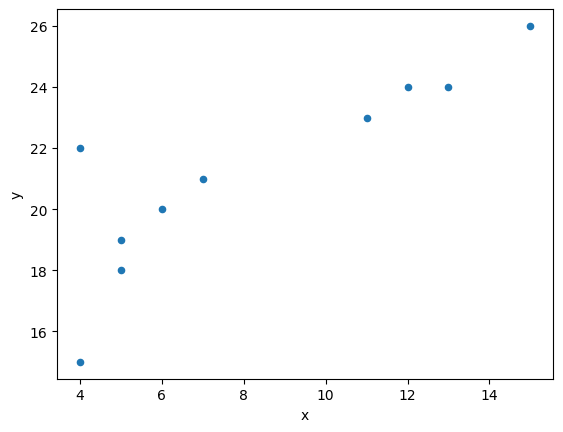

In [3]:
x = [4,  6,  7,  5,  4,  12, 15 , 5, 13, 11]
y = [22, 20, 21, 18, 15, 24, 26, 19, 24, 23]
df = pd.DataFrame({'x': x, 'y': y})
ax = df.plot.scatter(x='x', y='y')

### Next, let's look at  a simple coloring of the points 
- Not using K-Means yet.  
- We're just coloring naively, with no thought
- Note how the list `c` has the same length as `x` and `y`.  It contains the color for each point

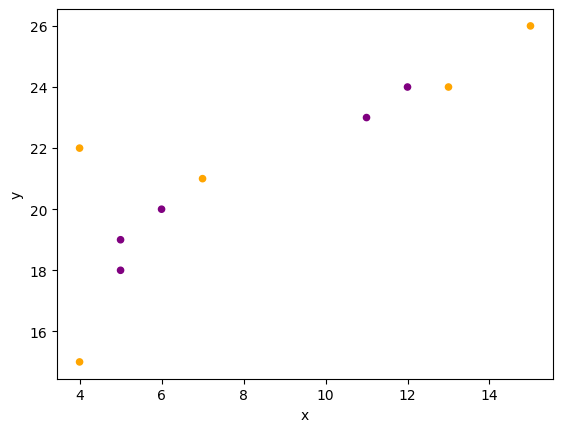

In [4]:
# scatter with color list, showing them how to do that
c = ['orange', 'purple', 'orange', 'purple', 'orange', 'purple', 'orange', 'purple', 'orange', 'purple']
ax = df.plot.scatter(x='x', y='y', c=c)

### But this doesn't look very good! 

### The yellow points are group 1, and the purple points are group 2

### The points close together are NOT grouped together!

### Let's apply K-Means

### However, first for K-Means, we need to get our data in the right format

### Task:  create a new list called `data` that combines `x` and `y` to look like this 

     print(data) 
     
     [(4, 22), (6, 20), (7, 23), (5, 18), (4, 15), (12, 24), (15, 26), (5, 19), (13, 24), (11, 23)]


In [5]:
# create new list called data


## Solution file Only
#
data = list(zip(x, y))
print(data)

[(4, 22), (6, 20), (7, 21), (5, 18), (4, 15), (12, 24), (15, 26), (5, 19), (13, 24), (11, 23)]


### Now, we can run K-Means

In [6]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)


KMeans(n_clusters=2)

### Print your output

Your output should be either

     [0 0 0 0 0 1 1 0 1 1]

Or

     [1 1 1 1 1 0 0 1 0 0]

In [7]:
print(kmeans.labels_)

[0 0 0 0 0 1 1 0 1 1]


### The output of K-Means can change!
- K-Means always starts with random initial guesses to the groups of points.
- So, each time you run K-Means, you might get a different answer

### Let's examine the labels in more detail

1. We execute K-Means as follows

        kmeans = KMeans(n_clusters=2)
        kmeans.fit(data)

2. And then the labels are located here

        kmeans.labels_

3. Point 0 is in cluster `kmeans.labels_[0]`.  Point 1 is in cluster `kmeans.labels_[1]`, and so on.   

4. So if 

        kmeans.labels_ = [1 1 1 1 1 0 0 1 0 0]

   Then, points 0, 1, 2, 3, 4, and 7 are in the same cluster.  Points 5, 6, 8 and 9 are in the other.

### Note regarding clusters:

It doesn't matter if `0, 1, 2, 3, 4, and 7` are in cluster 0 and `5, 6, 8 and 9` are in cluster 1.  

Or the flip, if `0, 1, 2, 3, 4, and 7` are in cluster 1 and `5, 6, 8 and 9` are in cluster 0.  

All that matters is that they are in different clusters, because these points form different groupings.

### Stop and ask if you need help understanding how points are in certain clusters

### Task: Create a loop that prints out each point and it's group (cluster number)

Your output should look like this

        point: (4, 22) is in group 0
        point: (6, 20) is in group 0
        point: (7, 21) is in group 0
        point: (5, 18) is in group 0
        point: (4, 15) is in group 0
        point: (12, 24) is in group 1
        point: (15, 26) is in group 1
        point: (5, 19) is in group 0
        point: (13, 24) is in group 1
        point: (11, 23) is in group 1
        
        
Or the flip,

        point: (4, 22) is in group 1
        point: (6, 20) is in group 1
        point: (7, 21) is in group 1
        point: (5, 18) is in group 1
        point: (4, 15) is in group 1
        point: (12, 24) is in group 0
        point: (15, 26) is in group 0
        point: (5, 19) is in group 1
        point: (13, 24) is in group 0
        point: (11, 23) is in group 0

In [8]:
# Create loop here


# Solution file only

for i in range(10):
    point = data[i]
    label = kmeans.labels_[i]
    print("point:", point, "is in group", label)

point: (4, 22) is in group 0
point: (6, 20) is in group 0
point: (7, 21) is in group 0
point: (5, 18) is in group 0
point: (4, 15) is in group 0
point: (12, 24) is in group 1
point: (15, 26) is in group 1
point: (5, 19) is in group 0
point: (13, 24) is in group 1
point: (11, 23) is in group 1


### Task.  Next, we need to generate an informative plot.  

### Create a list `c` that equals 

    ['orange', 'orange', 'orange', 'orange', 'orange', 'purple', 'purple', 'orange', 'purple', 'purple']
    
Or

    ['purple', 'purple', 'purple', 'purple', 'purple', 'orange', 'orange', 'purple', 'orange', 'orange']

where entry k of the list equals `colors[ kmeans.labels_[k] ]`.  

That is  `c[k]` should equal `colors[ kmeans.labels_[k] ]`.

In [9]:
# Create list c


## Solution File Only
#
colors = [ 'orange', 'purple']
c = [colors[k] for k in kmeans.labels_]

### Task: Now, do a scatter plot with your new list `c`

You should get a picture like (or possibly with the colors flipped)

<img src="https://raw.githubusercontent.com/jbschroder/CS108/main/lecture_images/kmeans_scatter.png" width="450">

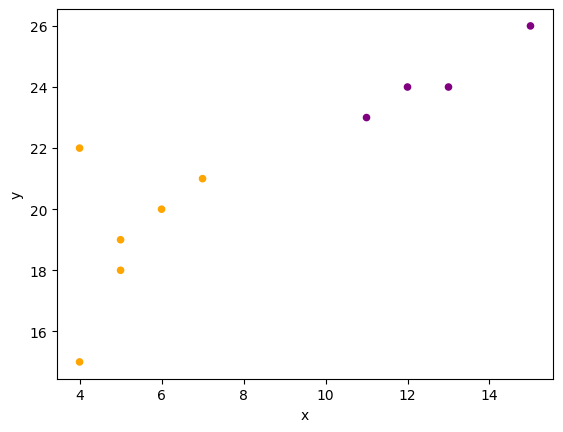

In [10]:
# Create scatter plot here


## Solution file only
# 
ax = df.plot.scatter(x='x', y='y', c=c)

### Remember, that each cluster has a center.  

### Lets take a look

In [11]:
center0 = kmeans.cluster_centers_[0]
center1 = kmeans.cluster_centers_[1]
print("center 0:", center0)
print("center 1:", center1)


center 0: [ 5.16666667 19.16666667]
center 1: [12.75 24.25]


### Now, we plot our centers.

After a scatter plot, you can still put new information in your plot using `ax`.  For instance, to plot center 0 in orange, you would do

        ax.plot(center0[0], center0[1], 'x', c='orange')
        
Task: Insert code in below cell to do both a scatter plot, and plot the centers
 - Plot center 0 in the correct color (orange or purple)
 - Plot center 1 in the correct color (orange or purple)

You should get a picture like 
<img src="https://raw.githubusercontent.com/jbschroder/CS108/main/lecture_images/kmeans_scatter_w_centroid.png" width="450">

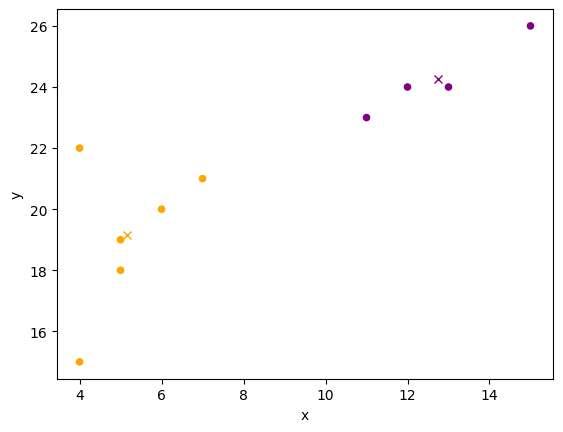

In [12]:
# Plot centers using ax.plot(...)


## Solution file only
# 
ax = df.plot.scatter(x='x', y='y', c=c)
ax.plot(center0[0], center0[1], 'x', c='orange')
ax.plot(center1[0], center1[1], 'x', c='purple')

### Inertia with K-Means

- Inertia is the sum of the distance between every point in a cluster and the center

- What do you think a good value for inertia is for a cluster?  Large or small?

- What happens if we go from 2 clusters to 3 clusters and inertia doesn't change much?

<img src="https://raw.githubusercontent.com/jbschroder/CS108/main/lecture_images/kmeans_inertia2.png" width="450">

### We want small inertias

### A small inertia means that all the points are close to their group's center

### If going from K groups to K+1 groups doesn't change the inertia much, then we have enough groups.


### Task: Run the below code cell.  This code generates K-Means using 1 cluster, then 2 clusters, then 3 clusters, up to 10 clusters.


### The list `inertias[k]` stores the inertia when using `k` clusters

### Task: Convert `inertias` to a dataframe and generate a plot that looks like this
- Make sure to give title and xlabel and ylabel

<img src="https://raw.githubusercontent.com/jbschroder/CS108/main/lecture_images/kmeans_inertia1.png" width="450">



In [13]:
## Ignore warnings, we're just exploring
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)



[Text(0.5, 1.0, 'K-Means Inertia'),
 Text(0.5, 0, 'Number of Groups'),
 Text(0, 0.5, 'Inertia')]

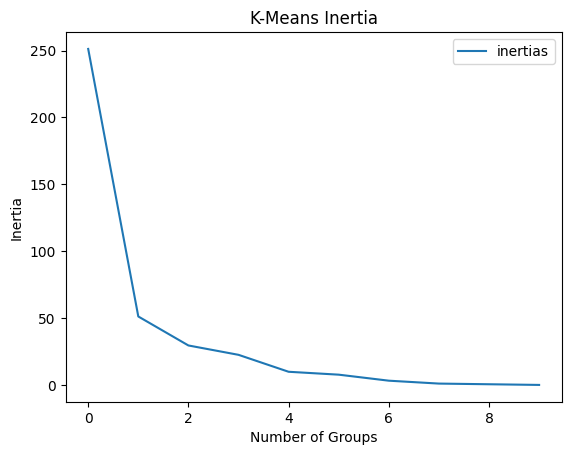

In [14]:
# Generate inertia plot


## Solution file only
#
df_inertia = pd.DataFrame({'inertias': inertias})
ax = df_inertia.plot(kind='line', style=['-'])
ax.set(title="K-Means Inertia", xlabel="Number of Groups", ylabel="Inertia" )


### Task: How many groups (clusters) do you think you need?

### Does going from 2 groups to 3 groups, or from 3 groups to 4 groups lower the inertia by much?

### Insert your discusion in the below cell using this template


Application of a Quantitative Model: K-Means
1. Describe the model used (K-Means)
    - What is K-means.  How does K-Means work?  
    - What do we use K-Means for?  To quantitatively analyze data...
2. Plot your data after K-Means to show the application of the model
  - Possibly plot for various numbers of clusters
  - Show and discuss elbow plot
  - Show that you've explored the model


insert discussion

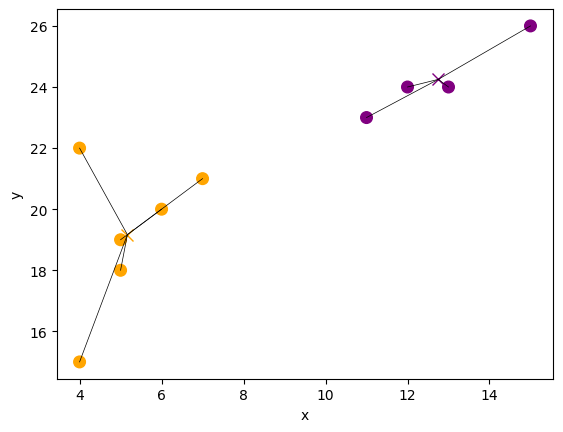

In [15]:
%matplotlib inline

# K-Means toolkit
from sklearn.cluster import KMeans

# Data manipulation and analysis.http://localhost:8888/notebooks/kmeans1.ipynb#
import pandas as pd

##########

# complete the basic clustering
x = [4,  6,  7,  5,  4,  12, 15 , 5, 13, 11]
y = [22, 20, 21, 18, 15, 24, 26, 19, 24, 23]

data = list(zip(x, y))
df = pd.DataFrame({'x': x, 'y': y})

kmeans = KMeans(n_clusters=2)
kmeans.fit(data)

###########

colors = [ 'purple', 'orange', 'olive', 'magenta', 'teal', 'red']
c = [colors[k] for k in kmeans.labels_]

centroid0 = kmeans.cluster_centers_[0]
centroid1 = kmeans.cluster_centers_[1]

ax = df.plot.scatter(x='x', y='y', c=c, s=70)
ax.plot(centroid0[0], centroid0[1], 'x', c='purple', ms=8)
ax.plot(centroid1[0], centroid1[1], 'x', c='orange', ms=8)

# plot line between centroid and cluster
for (x1,y1,cluster) in zip(x,y,kmeans.labels_):
    ax.plot([x1, kmeans.cluster_centers_[cluster,0]],  [y1, kmeans.cluster_centers_[cluster,1]], '-k', linewidth=0.5)
